# Converting CPTECs MERGE files

Author     : MJT (mjt@if.usp.br)

Institution: RCGI / IFUSP

Date       : 18-May-2022

Version    : PA2

- Box to select data only from South America
- Included poligon to close grid

Date       : 27-Apr-2022

Version    : PA1

- initial version of this code

Cuidados a se tomar com os GRIBs:
1. verificar a latitude e longitude. Caso não estejam no intervalo [-180,180] fazer a transformação
2. Desenhar os polígonos

In [21]:
import os 
import xarray as xr
# import rioxarray as rio
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

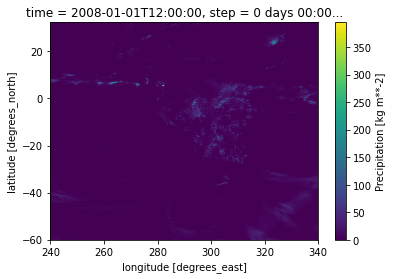

In [22]:
filename = '../../MarcoFranco/MERGE_CPTEC/2008/01/MERGE_CPTEC_20080101.grib2'
cptec_file = xr.open_dataset(filename,engine = 'cfgrib')

cptec_file.prec.plot()

In [23]:
cptec_file

<xarray.Dataset>
Dimensions:     (latitude: 924, longitude: 1001)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude   (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 340.0
    valid_time  datetime64[ns] ...
Data variables:
    prec        (latitude, longitude) float32 ...
    prmsl       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2022-05-18T09:08 GRIB to CDM+CF via cfgrib-0.9.1...

Apenas uma visualizaçao intermediária. Note que as coordenadas ainda não foram transformadas e por isso ele funciona bem no Cartopy

Text(0.5, 1.0, 'precipitation')

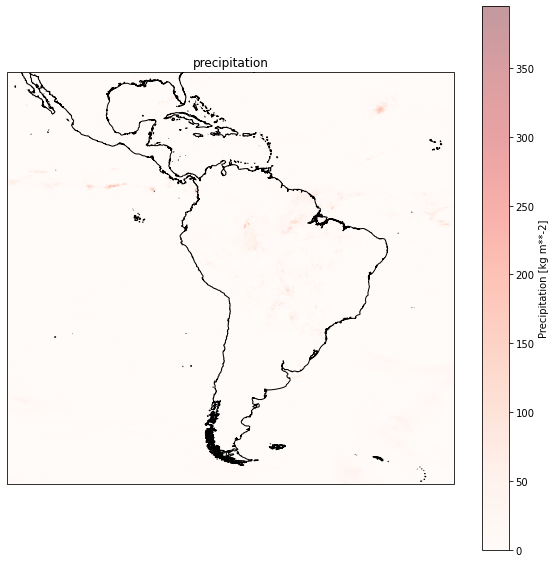

In [24]:
import cartopy.crs as ccrs
# import cartopy

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution="10m")
plot = cptec_file.prec.plot(
    cmap=plt.cm.Reds, transform=ccrs.PlateCarree(),alpha=0.4)
plt.title("precipitation")

In [25]:
# extract precipitation

cptec_file = cptec_file[[
    'longitude',
    'latitude',
    'prec'
]]
cptec_file = cptec_file.to_dataframe()
cptec_file
# my_prec = cptec_file.get('prec')
# df_prec = my_prec.to_dataframe()

prec                time   step  surface  \
longitude latitude                                             
239.95    -60.05    0.00 2008-01-01 12:00:00 0 days      0.0   
          -59.95    5.75 2008-01-01 12:00:00 0 days      0.0   
          -59.85    5.00 2008-01-01 12:00:00 0 days      0.0   
          -59.75    5.50 2008-01-01 12:00:00 0 days      0.0   
          -59.65    5.00 2008-01-01 12:00:00 0 days      0.0   
...                  ...                 ...    ...      ...   
339.95     31.85    0.00 2008-01-01 12:00:00 0 days      0.0   
           31.95    0.00 2008-01-01 12:00:00 0 days      0.0   
           32.05    0.00 2008-01-01 12:00:00 0 days      0.0   
           32.15    0.00 2008-01-01 12:00:00 0 days      0.0   
           32.25    0.00 2008-01-01 12:00:00 0 days      0.0   

                            valid_time  
longitude latitude                      
239.95    -60.05   2008-01-01 12:00:00  
          -59.95   2008-01-01 12:00:00  
          -59.85   2008-01-01 12:00:00  
          -59.75   2008-01-01 12:00:00  
          -59.65   2008-01-01 12:00:00  
...                                ...  
339.95     31.85   2008-01-01 12:00:00  
           31.95   2008-01-01 12:00:00  
           32.05   2008-01-01 12:00:00  
           32.15   2008-01-01 12:00:00  
           32.25   2008-01-01 12:00:00  

[924924 rows x 5 columns]

In [26]:
# extracting lat long and prec 
# transforming the longitudes


lats = cptec_file.index.get_level_values('latitude')
longs = cptec_file.index.get_level_values('longitude')
# time = cptec_file.index.get_level_values('time')
# prec = cptec_file.index.get_level_values('prec')

cptec_file["latitude"] = lats
# cptec_file['time'] = time
# cptec_file['prec'] = prec
map_function = lambda lon: (lon - 360) if (lon > 180) else lon
remapped_longs = longs.map(map_function)
cptec_file["long"] = remapped_longs
cptec_file["lat"] = lats
cptec_file

prec                time   step  surface  \
longitude latitude                                             
239.95    -60.05    0.00 2008-01-01 12:00:00 0 days      0.0   
          -59.95    5.75 2008-01-01 12:00:00 0 days      0.0   
          -59.85    5.00 2008-01-01 12:00:00 0 days      0.0   
          -59.75    5.50 2008-01-01 12:00:00 0 days      0.0   
          -59.65    5.00 2008-01-01 12:00:00 0 days      0.0   
...                  ...                 ...    ...      ...   
339.95     31.85    0.00 2008-01-01 12:00:00 0 days      0.0   
           31.95    0.00 2008-01-01 12:00:00 0 days      0.0   
           32.05    0.00 2008-01-01 12:00:00 0 days      0.0   
           32.15    0.00 2008-01-01 12:00:00 0 days      0.0   
           32.25    0.00 2008-01-01 12:00:00 0 days      0.0   

                            valid_time  latitude    long    lat  
longitude latitude                                               
239.95    -60.05   2008-01-01 12:00:00    -60.05 -120.05 -60.05  
          -59.95   2008-01-01 12:00:00    -59.95 -120.05 -59.95  
          -59.85   2008-01-01 12:00:00    -59.85 -120.05 -59.85  
          -59.75   2008-01-01 12:00:00    -59.75 -120.05 -59.75  
          -59.65   2008-01-01 12:00:00    -59.65 -120.05 -59.65  
...                                ...       ...     ...    ...  
339.95     31.85   2008-01-01 12:00:00     31.85  -20.05  31.85  
           31.95   2008-01-01 12:00:00     31.95  -20.05  31.95  
           32.05   2008-01-01 12:00:00     32.05  -20.05  32.05  
           32.15   2008-01-01 12:00:00     32.15  -20.05  32.15  
           32.25   2008-01-01 12:00:00     32.25  -20.05  32.25  

[924924 rows x 8 columns]

In [27]:
cptec_file[['time','prec','lat','long']]

time  prec    lat    long
longitude latitude                                         
239.95    -60.05   2008-01-01 12:00:00  0.00 -60.05 -120.05
          -59.95   2008-01-01 12:00:00  5.75 -59.95 -120.05
          -59.85   2008-01-01 12:00:00  5.00 -59.85 -120.05
          -59.75   2008-01-01 12:00:00  5.50 -59.75 -120.05
          -59.65   2008-01-01 12:00:00  5.00 -59.65 -120.05
...                                ...   ...    ...     ...
339.95     31.85   2008-01-01 12:00:00  0.00  31.85  -20.05
           31.95   2008-01-01 12:00:00  0.00  31.95  -20.05
           32.05   2008-01-01 12:00:00  0.00  32.05  -20.05
           32.15   2008-01-01 12:00:00  0.00  32.15  -20.05
           32.25   2008-01-01 12:00:00  0.00  32.25  -20.05

[924924 rows x 4 columns]

In [28]:
# tnc esse pandas lazarento... 
cpcp = cptec_file[['time','prec']]

cpcp = cpcp.reset_index()
remapped_longs = longs.map(map_function)
cpcp["longitude"] = remapped_longs
# cpcp["latitude"] = lats
cpcp


,longitude,latitude,time,prec
0,-120.05,-60.05,2008-01-01 12:00:00,0.00
1,-120.05,-59.95,2008-01-01 12:00:00,5.75
2,-120.05,-59.85,2008-01-01 12:00:00,5.00
3,-120.05,-59.75,2008-01-01 12:00:00,5.50
4,-120.05,-59.65,2008-01-01 12:00:00,5.00
...,...,...,...,...
924919,-20.05,31.85,2008-01-01 12:00:00,0.00
924920,-20.05,31.95,2008-01-01 12:00:00,0.00
924921,-20.05,32.05,2008-01-01 12:00:00,0.00
924922,-20.05,32.15,2008-01-01 12:00:00,0.00


In [29]:
# roughly a box covering Latin America

min_lat = -57.5858
max_lat =  12.5988
min_lon = -95.8360
max_lon = -27.8750


lat_filter = (cpcp["latitude"] >= min_lat) & (cpcp["latitude"] <= max_lat)
lon_filter = (cpcp["longitude"] >= min_lon) & (cpcp["longitude"] <= max_lon)

# cpcp = cpcp.loc[lat_filter & lon_filter]

cpcp = cpcp[lat_filter & lon_filter]

In [30]:
import geopandas as gpd 
from shapely.geometry import Polygon, Point, MultiPolygon

# converting to geopandas
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(cpcp['longitude'], cpcp['latitude'])]
geo_df = gpd.GeoDataFrame(cpcp, 
                          crs = crs, 
                          geometry = geometry)

geo_df

/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,longitude,latitude,time,prec,geometry
224557,-95.75,-57.55,2008-01-01 12:00:00,0.125,POINT (-95.75000 -57.55000)
224558,-95.75,-57.45,2008-01-01 12:00:00,0.000,POINT (-95.75000 -57.45000)
224559,-95.75,-57.35,2008-01-01 12:00:00,0.500,POINT (-95.75000 -57.35000)
224560,-95.75,-57.25,2008-01-01 12:00:00,0.375,POINT (-95.75000 -57.25000)
224561,-95.75,-57.15,2008-01-01 12:00:00,0.250,POINT (-95.75000 -57.15000)
...,...,...,...,...,...
851726,-27.95,12.15,2008-01-01 12:00:00,0.000,POINT (-27.95000 12.15000)
851727,-27.95,12.25,2008-01-01 12:00:00,0.000,POINT (-27.95000 12.25000)
851728,-27.95,12.35,2008-01-01 12:00:00,0.125,POINT (-27.95000 12.35000)
851729,-27.95,12.45,2008-01-01 12:00:00,0.125,POINT (-27.95000 12.45000)


In [32]:
gdf  = geo_df.iloc[:,[3,4]]
gdf

,prec,geometry
224557,0.125,POINT (-95.75000 -57.55000)
224558,0.000,POINT (-95.75000 -57.45000)
224559,0.500,POINT (-95.75000 -57.35000)
224560,0.375,POINT (-95.75000 -57.25000)
224561,0.250,POINT (-95.75000 -57.15000)
...,...,...
851726,0.000,POINT (-27.95000 12.15000)
851727,0.000,POINT (-27.95000 12.25000)
851728,0.125,POINT (-27.95000 12.35000)
851729,0.125,POINT (-27.95000 12.45000)


Text(0.5, 1.0, 'prec')

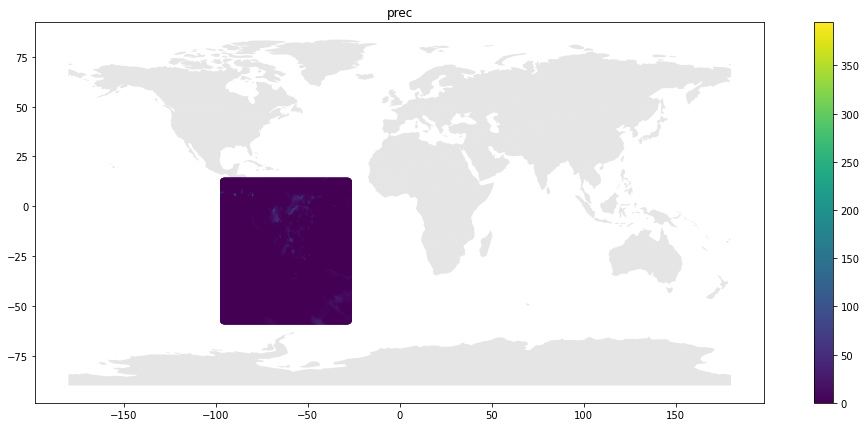

In [34]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(18, 7))
world.plot(ax=ax, alpha=0.2, color='grey')
gdf.plot(column='prec', ax=ax, legend=True,alpha=0.4)

plt.title('prec')


In [35]:
import time
start_time = time.time()

gdf.to_file('grib2test.shp')

print('Processing time:', time.time()-start_time)

/home/mapbiomasar/miniconda3/envs/geoproc/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


Processing time: 26.462584257125854


## Building a time series with merged file

In [ ]:
# # getting precipitation and converting to a DF

# my_prec = merged.get('prec')
# df_prec = my_prec.to_dataframe()

# lats = df_prec.index.get_level_values('latitude')
# longs = df_prec.index.get_level_values('longitude')
# time = df_prec.index.get_level_values('time')

# df_prec["longitude"] = longs
# df_prec["latitude"] = lats
# df_prec['time'] = time


In [ ]:
# df_prec = df_prec[['latitude','longitude','time','prec']]

# #filtering a location

# # # Petrolina 9.3995° S, 40.5024° W


# # min_lat = -9.50
# # max_lat = -9.35
# # min_long = 320.10
# # max_long = 320.50




# min_lat = -23.50
# max_lat = -23.35
# min_long = 249.20
# max_long = 249.30

# lat_filter = (df_prec["latitude"] >= min_lat) & (df_prec["latitude"] <= max_lat)
# lon_filter = (df_prec["longitude"] >= min_long) & (df_prec["longitude"] <= max_long)

# df_prec_plot = df_prec.loc[lat_filter & lon_filter]


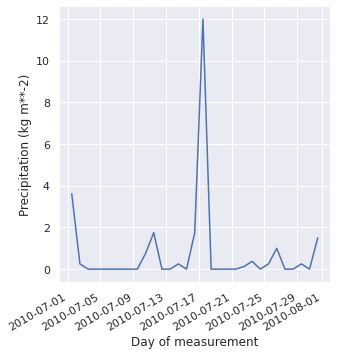

In [ ]:
# import seaborn as sns
# sns.set_theme(style="darkgrid")
# my_plot = sns.relplot(x="time", y="prec", kind = 'line', data=df_prec_plot)
# my_plot.figure.autofmt_xdate()
# my_plot.set_axis_labels("Day of measurement", "Precipitation (kg m**-2)")
